In [ ]:
library(mlr3)
library(mlr3learners)
library(ggplot2)
library(mlbench)
library(mlr3viz)

## Solution 1: Naive Bayes

In [1]:
#| label: naivebayes
df_banana <- data.frame(
  color = as.factor(
    c("yellow", "yellow", "yellow", "brown", "brown", "green", "green", "red")),
  form = as.factor(
    c("oblong", "round", "oblong", "oblong", "round", "round", "oblong", "round")),
  origin = as.factor(
    c("imported", "domestic", "imported", "imported", "domestic", "imported",
    "domestic", "imported")),
  banana = as.factor(c("yes", "no", "no", "yes", "no", "yes", "no", "no")))

new_fruit <- data.frame(color = "yellow", form = "round", origin = "imported")

nb_learner <- lrn("classif.naive_bayes", predict_type = "prob")

banana_task <- TaskClassif$new(
  id = "banana",
  backend = df_banana,
  target = "banana")

nb_learner$train(banana_task)
nb_learner$predict_newdata(new_fruit)

<PredictionClassif> for 1 observations:
 row_ids truth response   prob.no  prob.yes
       1  <NA>       no 0.5901639 0.4098361

## Solution 2: Discriminant Analysis

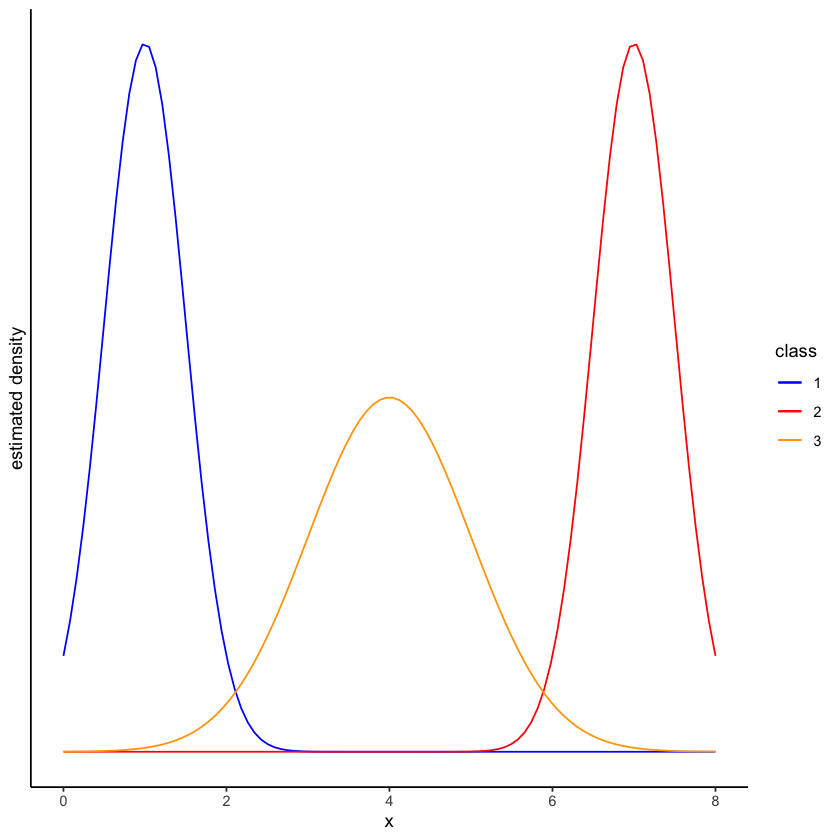

In [2]:
#| label: discriminantanalysis
library(ggplot2)

colors <- c("1" = "blue", "2" = "red", "3" = "orange")
 
ggplot(data.frame(x = c(0, 8)), aes(x = x)) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 1, sd = 0.5), aes(col = "1")) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 7, sd = 0.5), aes(col = "2")) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 4, sd = 1), aes(col = "3")) +
  scale_color_manual("class", values = colors) +
  theme_classic() +
  ylab("estimated density") +
  scale_y_continuous(breaks = NULL)

## Solution 3: Decision Boundaries for Classification Learners

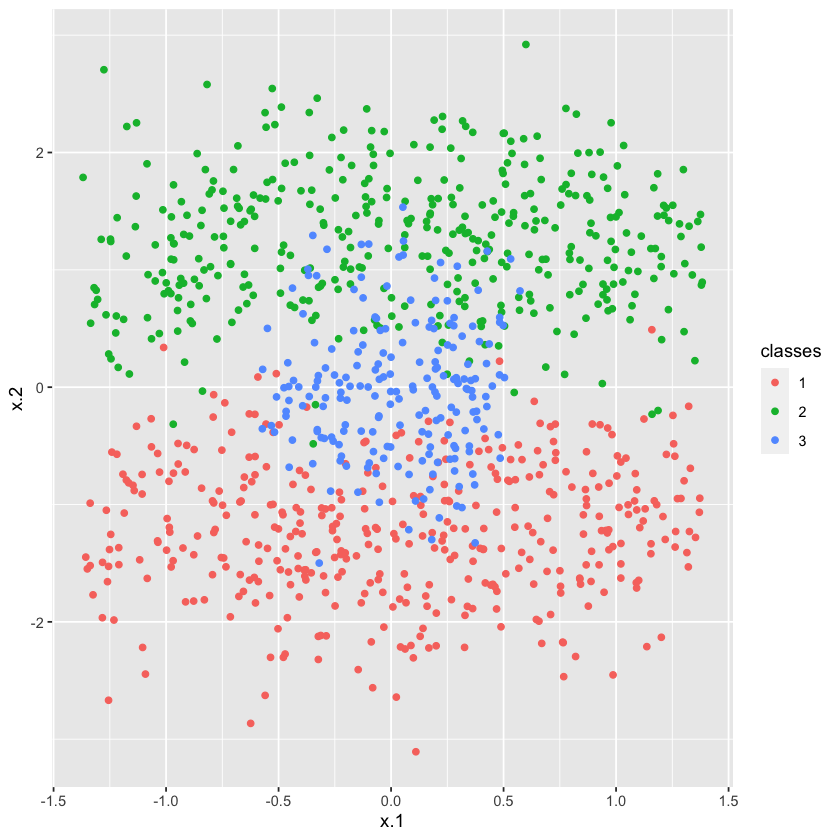

In [3]:
#| label: decb-vis

# Make sure all necessary packages are loaded
# and visualize the simulated cassini data:

# simulate data
set.seed(123L)
data_raw <- mlbench::mlbench.cassini(n = 1000)
df <- as.data.frame(data_raw)
df$x.2 <- df$x.2 + rnorm(nrow(df), sd = 0.5)

# visualize
ggplot2::ggplot(df, aes(x = x.1, y = x.2, col = classes)) +
  geom_point()

In [4]:
#| label: decb-learn

# Create the task and train all 3 Learners:

# create task
task <- mlr3::TaskClassif$new(
  id = "spirals_task", 
  backend = df,
  target = "classes")

# define learners
learners <- list(
  mlr3::lrn("classif.lda"),
  mlr3::lrn("classif.qda"),
  mlr3::lrn("classif.naive_bayes"))

INFO  [14:56:59.381] [mlr3] Applying learner 'classif.lda' on task 'spirals_task' (iter 1/1)
INFO  [14:56:59.962] [mlr3] Applying learner 'classif.qda' on task 'spirals_task' (iter 1/1)
INFO  [14:57:00.049] [mlr3] Applying learner 'classif.naive_bayes' on task 'spirals_task' (iter 1/1)


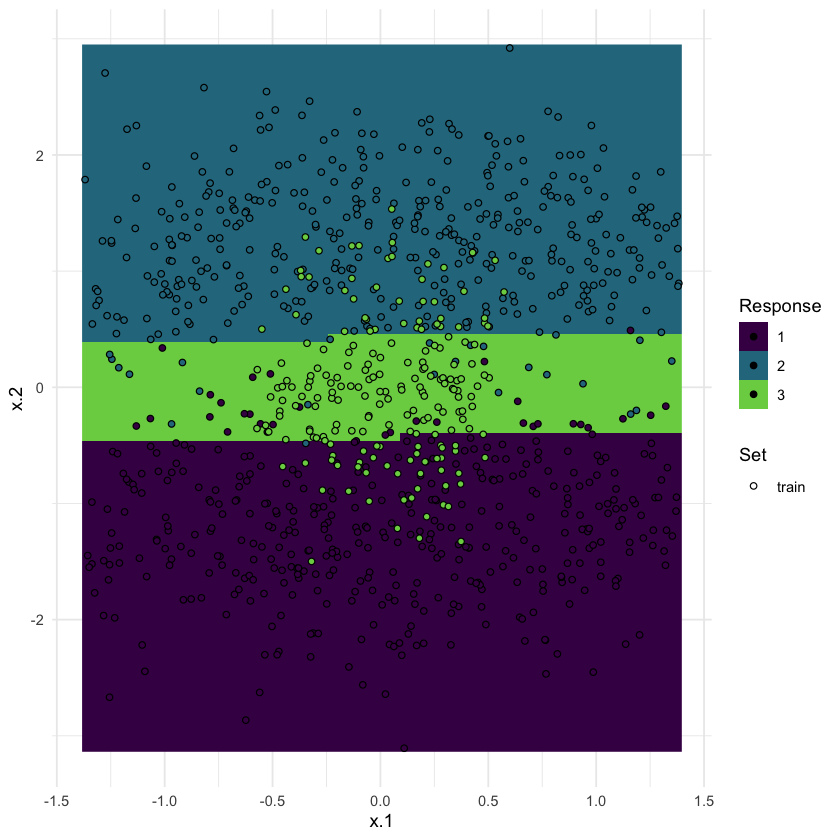

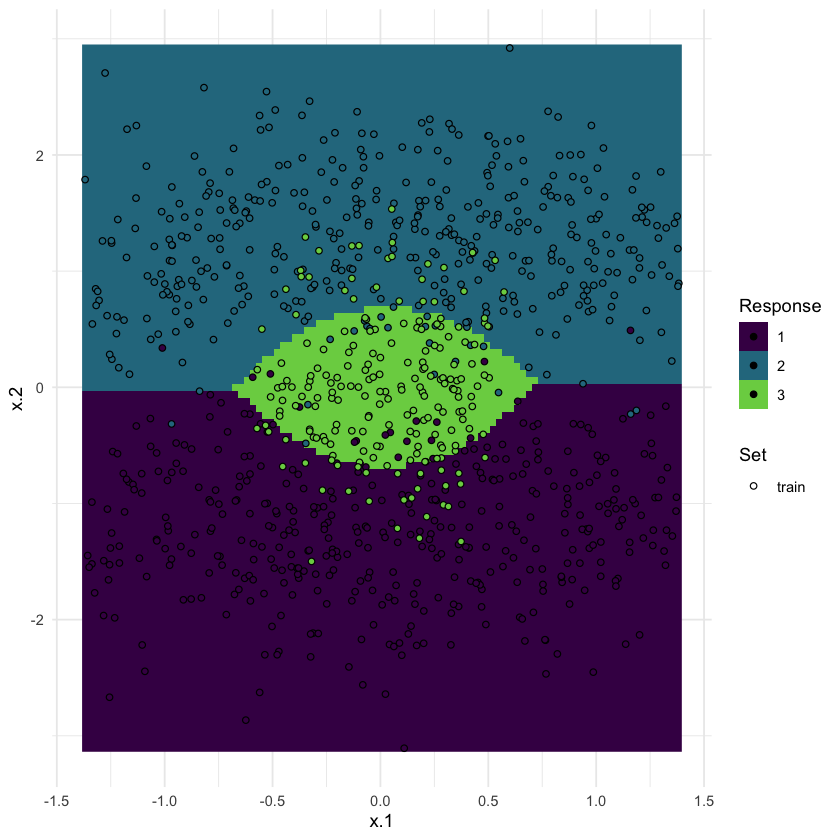

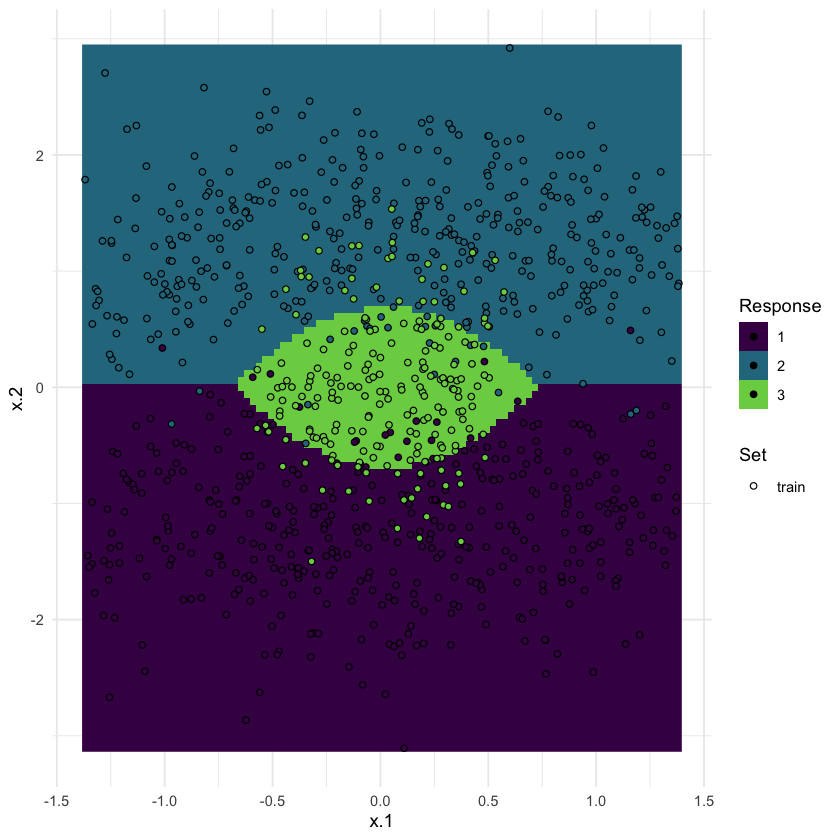

In [5]:
#| label: decb-plot

# train and plot decision boundaries
plots <- lapply(learners, function(i) mlr3viz::plot_learner_prediction(i, task))
for (i in plots) print(i)